In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_parquet("accident_vehicle_preprocessed.parquet")
df.head()

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
0,3.000000,0,5.268217,8268.00000,1,6,93,8118,5,1,...,0,30,1,1,2005,0,17,5,1,45.0
1,5.000000,3,3.000000,8300.00000,1,8,93,8118,5,1,...,3,30,1,1,2005,0,0,6,1,35.0
2,10.000000,0,5.268217,85.00000,2,8,140,8118,8,1,...,3,30,1,1,2005,0,21,10,1,55.0
3,6.402357,0,5.268217,2142.73833,2,0,15,3699,0,1,...,3,30,1,1,2005,0,20,13,1,35.0
4,4.000000,3,6.000000,4266.00000,2,0,240,12714,8,1,...,3,30,1,1,2005,0,20,13,1,45.0


In [3]:
df['Accident_Severity'].unique()

array([0, 1, 2])

In [4]:
df['Accident_Severity'].value_counts()

0    420767
1     59062
2      6695
Name: Accident_Severity, dtype: int64

In [5]:
df2=df.copy()

In [6]:
df2['Accident_Severity']=df2['Accident_Severity'].replace(to_replace=2, value=1)

In [7]:
df2['Accident_Severity'].unique()

array([0, 1])

In [8]:
df2['Accident_Severity'].value_counts()

0    420767
1     65757
Name: Accident_Severity, dtype: int64

In [9]:
#identify dependent and independent variables
X=df2.drop('Accident_Severity', axis=1)
y=df2.Accident_Severity

84 percent of data is 'Slightly', 16 percent is 'Serious'

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
def Feature_Scaling(X_train, X_test):
    scaler = StandardScaler()
    X_train_after_Scaling=scaler.fit_transform(X_train)
    X_test_after_Scaling=scaler.fit_transform(X_test)
    return X_train_after_Scaling, X_test_after_Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

X_train_after_Scaling,X_test_after_Scaling=Feature_Scaling(X_train,X_test)

Text(0.5, 1.0, 'X_train_after_Scaling')

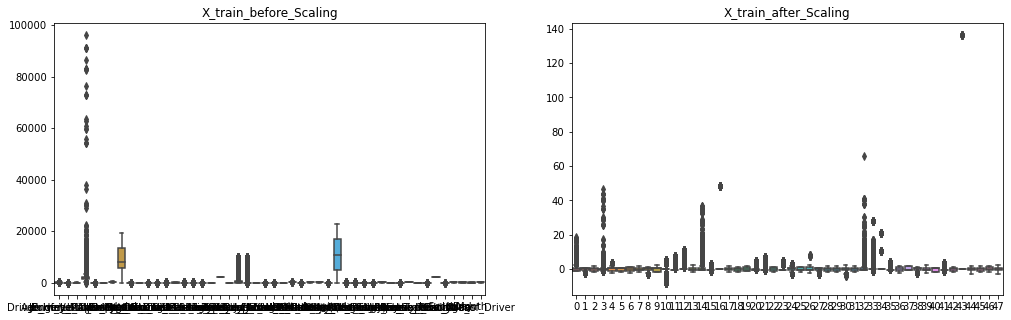

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train_before_Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_after_Scaling)
plt.title('X_train_after_Scaling')

In [14]:
corr_matrix=df2.corr()
corr_matrix['Accident_Severity'].sort_values(ascending=False)

Accident_Severity                              1.000000
Number_of_Casualties                           0.090763
Speed_limit                                    0.073440
X1st_Point_of_Impact                           0.068950
Vehicle_Leaving_Carriageway                    0.067541
Vehicle_Type                                   0.060318
Junction_Location                              0.058626
Sex_of_Driver                                  0.055320
LSOA_of_Accident_Location                      0.046147
Road_Type                                      0.017195
Age_of_Vehicle                                 0.015540
model                                          0.015039
Driver_IMD_Decile                              0.014689
Engine_Capacity_.CC.                           0.012601
Propulsion_Code                                0.010732
Vehicle_Location.Restricted_Lane               0.010719
Age_of_Driver                                  0.007833
Local_Authority_(District)                     0

# Model Implementation: Random Forest

In [15]:
#models implementation and evaluation

from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train_after_Scaling, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test_after_Scaling)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.873696110169056


C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


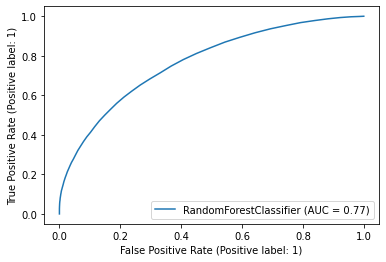

In [16]:
from sklearn import metrics

metrics.plot_roc_curve(clf, X_test_after_Scaling, y_test) 

plt.show()

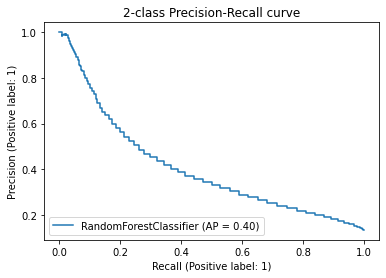

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test_after_Scaling, y_test, name="RandomForestClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[83904   259]
 [12031  1111]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     84163
           1       0.81      0.08      0.15     13142

    accuracy                           0.87     97305
   macro avg       0.84      0.54      0.54     97305
weighted avg       0.87      0.87      0.83     97305



# Undersampling

In [20]:
from collections import Counter
Counter(y_train)

Counter({0: 336604, 1: 52615})

52615 is 15.631127378165% of 336604

In [22]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

ns=RandomUnderSampler(random_state=43)
X_train_ns, y_train_ns=ns.fit_resample(X_train_after_Scaling,y_train)
print("The number of classes before ns {}".format(Counter(y_train)))
print("The number of classes after ns {}".format(Counter(y_train_ns)))

The number of classes before ns Counter({0: 336604, 1: 52615})
The number of classes after ns Counter({0: 52615, 1: 52615})


In [23]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=classifier.predict(X_test_after_Scaling)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[60073 24090]
 [ 4398  8744]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     84163
           1       0.27      0.67      0.38     13142

    accuracy                           0.71     97305
   macro avg       0.60      0.69      0.59     97305
weighted avg       0.84      0.71      0.75     97305



# Oversampling

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
os=RandomOverSampler(random_state=43)
X_train_os, y_train_os=os.fit_resample(X_train_after_Scaling,y_train)
print("The number of classes before os {}".format(Counter(y_train)))
print("The number of classes after os {}".format(Counter(y_train_os)))

The number of classes before os Counter({0: 336604, 1: 52615})
The number of classes after os Counter({0: 336604, 1: 336604})


In [27]:
classifier=RandomForestClassifier()
classifier.fit(X_train_os,y_train_os)

RandomForestClassifier()

In [28]:
y_pred=classifier.predict(X_test_after_Scaling)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[83410   753]
 [11446  1696]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     84163
           1       0.69      0.13      0.22     13142

    accuracy                           0.87     97305
   macro avg       0.79      0.56      0.57     97305
weighted avg       0.85      0.87      0.84     97305



# Easy Ensembler

In [29]:
from imblearn.ensemble import EasyEnsembleClassifier

In [30]:
ez=EasyEnsembleClassifier(random_state=110)
ez.fit(X_train_after_Scaling, y_train)

EasyEnsembleClassifier(random_state=110)

In [31]:
y_pred=ez.predict(X_test_after_Scaling)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[60710 23453]
 [ 5320  7822]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     84163
           1       0.25      0.60      0.35     13142

    accuracy                           0.70     97305
   macro avg       0.58      0.66      0.58     97305
weighted avg       0.83      0.70      0.75     97305



# ADASYN: Adaptive Synthetic Sampling

In [32]:
from imblearn.over_sampling import ADASYN

ada=ADASYN(random_state=130)
X_train_ada, y_train_ada=ada.fit_resample(X_train_after_Scaling,y_train)
print("The number of classes before ada {}".format(Counter(y_train)))
print("The number of classes after ada {}".format(Counter(y_train_ada)))

The number of classes before ada Counter({0: 336604, 1: 52615})
The number of classes after ada Counter({1: 340009, 0: 336604})


In [33]:
classifier=RandomForestClassifier()
classifier.fit(X_train_ada,y_train_ada)

RandomForestClassifier()

In [34]:
y_pred=classifier.predict(X_test_after_Scaling)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2656 81507]
 [  324 12818]]
              precision    recall  f1-score   support

           0       0.89      0.03      0.06     84163
           1       0.14      0.98      0.24     13142

    accuracy                           0.16     97305
   macro avg       0.51      0.50      0.15     97305
weighted avg       0.79      0.16      0.08     97305



# SMOTE

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smt=SMOTE(random_state=43,n_jobs=-1)
X_train_smt, y_train_smt=smt.fit_resample(X_train_after_Scaling,y_train)
print("The number of classes before smt {}".format(Counter(y_train)))
print("The number of classes after smt {}".format(Counter(y_train_smt)))

The number of classes before smt Counter({0: 336604, 1: 52615})
The number of classes after smt Counter({0: 336604, 1: 336604})


In [37]:
classifier=RandomForestClassifier()
classifier.fit(X_train_smt,y_train_smt)

RandomForestClassifier()

In [38]:
y_pred=classifier.predict(X_test_after_Scaling)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 2797 81366]
 [  319 12823]]
              precision    recall  f1-score   support

           0       0.90      0.03      0.06     84163
           1       0.14      0.98      0.24     13142

    accuracy                           0.16     97305
   macro avg       0.52      0.50      0.15     97305
weighted avg       0.79      0.16      0.09     97305



## Hyperparameter Tuning

In [ ]:
#param_grid = { 
 #   'n_estimators': [200, 500],
  #  'max_features': ['auto', 'sqrt', 'log2'],
   # 'max_depth' : [4,5,6,7,8],
    #'criterion' :['gini', 'entropy']
#}

In [ ]:
#from sklearn.model_selection import ParameterGrid
#from sklearn.model_selection import GridSearchCV, KFold


#rfc=RandomForestClassifier(random_state=42)
#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train_after_Scaling,y_train)

In [ ]:
#CV_rfc.best_params_

In [ ]:
#rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [ ]:
#rfc1.fit(X_train_after_Scaling, y_train)

In [ ]:
#pred=rfc1.predict(X_test_after_Scaling)

In [ ]:
#print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))